In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qiskit_metal import draw, Dict
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
from qiskit_metal.draw import  LineString
import math
import  numpy as np
from qiskit_metal.qlibrary.core.qroute import QRouteLead, QRoutePoint, QRoute

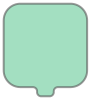

In [4]:
rect = draw.rectangle(1,1,0,0)
line = draw.LineString([(-1/2, 0),(1/2, 0)])
# rect.exterior.coords[:]
# rect = rect.buffer(0.2,3)
# rect = rect.buffer(-0.2,3)
radius = 0.2
def  round_corner_rectangle(radius,rect):
    rect1 = rect.buffer(radius, join_style=1)
    rect1 = rect1.buffer(-2*radius, join_style=1)
    rect1 = rect1.buffer(radius, join_style=1)
    return rect1
rect1 = round_corner_rectangle(radius,rect)
line = draw.LineString([(0,-0.5),(0,-0.51)]).buffer(0.1,cap_style=3)
shape = draw.unary_union([rect1,line])

round_corner_rectangle(0.05,shape)
# draw.shapely.geometrycollections([line,rect1])

In [5]:
# draw.box??
# 164+15*math.sqrt(2)/2
point1 = draw.Point((0,1))
point1.coords

In [49]:
radius = 0.5
angle=0

def arc(coord_init, coord_center, angle):


    # local variable
    r = radius
    step = 1e-3
    angle = np.pi*angle/180
    coord_center=draw.Point(coord_center)

    # determine step number
    step_angle = step / r if angle >= 0 else -step / r
    step_N = abs(int(angle / step_angle))
    #laststep_flag = True if angle % step_angle != 0 else False
    laststep_flag = bool(angle % step_angle != 0)

    # generate coordinate
    coord = []
    point = draw.Point(coord_init)
    for i in range(step_N):
        point = draw.rotate(point,
                            step_angle,
                            origin=coord_center,
                            use_radians=True)

        coord.append(np.array(point.coords[0]))
    if laststep_flag:
        point = draw.rotate(draw.Point(coord_init),
                            angle,
                            origin=coord_center,
                            use_radians=True)
        coord.append(np.array(point.coords[0]))
    return coord


def  vector_rotation(vec,angle):
    theta = np.deg2rad(angle)
    rot = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])
    return np.dot(rot,vec)

pin = Dict(middle=np.array([1,0]), normal=np.array([0,1]))
pts_list = []
z_line = QRouteLead()
z_line.seed_from_pin(pin=pin)
z_line.go_straight(0.2)
pts_list.append(z_line.get_tip().position)
pin1 = Dict(middle=z_line.get_tip().position, normal=z_line.get_tip().direction)
# z_line = QRouteLead()

center = z_line.get_tip().position+vector_rotation(z_line.get_tip().direction,90)*radius

arc_list =arc(z_line.get_tip().position,center,angle)

# pts_list = pts_list+arc_list
#
# # point = draw.Point(z_line.get_tip().position)
# pin1 = Dict(middle=arc_list[-1], normal=vector_rotation(z_line.get_tip().direction,angle))
# z_line.seed_from_pin(pin=pin1)
# z_line.go_straight(0.2)
# #
# pts_list.append(z_line.get_tip().position)
#
# draw.LineString(pts_list)


# pts_list
# test = []
# test.append(np.array(point.coords[0]))
# # np.array([1,2])
# test
# point.coords[1]
# draw.Point(z_line.get_tip().position)
arc_list[-1]

IndexError: list index out of range

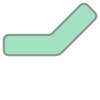

In [14]:
line = draw.LineString([(-0.5,0),(0,0),(math.sqrt(2)/4, math.sqrt(2)/4)])
line1 = line.buffer(0.1,join_style=1,cap_style=2)
# line1 = line1.buffer(0.07,join_style=1,cap_style=2)
# line1 = line1.buffer(-0.14,join_style=1,cap_style=2)
# line1.buffer(0.07,join_style=1,cap_style=2)
line1 = round_corner_rectangle(0.05,line1)
line1

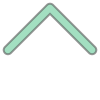

In [33]:
from shapely.ops import cascaded_union

# square = draw.Polygon([(0,0),(5,0),(5,5),(0,5)])
# rounded = square.buffer(-4,join_style=1,cap_style=2)
#
# corner = draw.Polygon([(0,0),(1,0),(1,1),(0,1)])
# rounded = draw.unary_union([corner,square])
# rounded

line1 = LineString([(0,0),(1,1)])
line2 = LineString([(1,1),(2,0)])
# line = draw.unary_union([line1,line2])
buffer = line1.union(line2).buffer(0.1,cap_style=1)
buffer

In [26]:
line = draw.LineString([(-0.5,0),(0,0)])
line.coords[0]
# line1 = line.buffer(0.1,join_style=1,cap_style=2)
# draw.shapely.geometrycollections([line,line1])

(-0.5, 0.0)

In [56]:
# define the existing line
line = LineString([(0, 0), (2, 2)])

# specify the desired length of the extended line
extended_length = -3-line.length

# calculate the current length of the line
current_length = line.length

# calculate the x- and y-distances between the line's endpoints
dx = line.coords[1][0] - line.coords[0][0]
dy = line.coords[1][1] - line.coords[0][1]

# calculate the new endpoint of the extended line
new_endpoint = (line.coords[1][0] + dx * (extended_length / current_length),
                line.coords[1][1] + dy * (extended_length / current_length))

# extend the line by creating a new LineString object with the original line's coordinates and the new endpoint
# extended_line = LineString(list(line.coords) + [new_endpoint])
#
# draw.shapely.geometrycollections([line,draw.Point(new_endpoint)])
np.array(new_endpoint)

array([-2.12132034, -2.12132034])

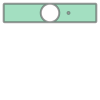

In [38]:
# line = draw.LineString([(math.sqrt(2)/4, math.sqrt(2)/4),(-math.sqrt(2)/4, -math.sqrt(2)/4)])
# line_cross = draw.LineString([(-math.sqrt(2)/2, math.sqrt(2)/2),(0, 0)])
# line0 = draw.LineString()
def  round_corner(radius,line):
    line1 = line.buffer(radius,cap_style=2)
    # line1 = line1.buffer(radius,join_style=1)
    line1 = line1.buffer(-2*radius,join_style=1)
    line1 = line1.buffer(radius,join_style=1)
    return  line1
line = draw.LineString([(-0.5,0),(0.5,0)])
# line0 = draw.LineString()
line1 = line.buffer(0.1,join_style=1,cap_style=2)
line1 = round_corner(0.01,line1)
line1 = line1.difference(draw.Point(0,0).buffer(0.1))
line1.difference(draw.Point(0.2,0).buffer(0.01))
# draw.shapely.geometrycollections([line,line1])
# line1 = round_corner(0.2,line)
# # line1 = line1.buffer(-0.5,join_style=1)
# # circle = draw.Point(0,0).buffer(0.2)
# # draw.subtract(line,circle)
# draw.shapely.geometrycollections([line,line1,line_cross])
# line.coords[0]

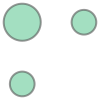

In [46]:
test_list = []
x1 = draw.Point(0, 0).buffer(3)
test_list.append(x1)
x2 = draw.Point(10,0).buffer(2)
test_list.append(x2)

x3 = draw.Point(0,-10).buffer(2)
test_list1 = [x3]
test = test_list1+test_list
draw.unary_union(test)

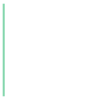

In [55]:
x= np.array([(0,0),(0,1),(1,0),(1,1)])
draw.LineString(x[:2])

In [45]:
import qiskit_metal as metal
?metal.qlibrary.core.QComponent.add_qgeometry

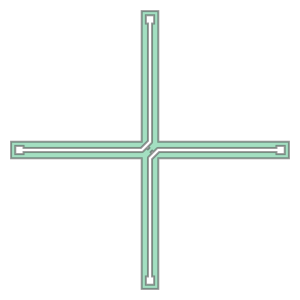

In [4]:
from shapely.ops import unary_union
from qiskit_metal.draw import LineString
import  math
# from shapely.measurement import length

cross_width = 1340.0
cross_height = 80.0
cross_inside_width = 20.0
pad_width = 40.0
pad_height = 40.0
pad_distance = 20.0
jj_pad_width = 10.0
jj_pad_height = 9.0
#draw two islands
cross_length = cross_width/2
start_point = cross_width/2-pad_width/2-pad_distance
mid_point = cross_height/2
num_interpolation = 5
point_space = (start_point-mid_point)/num_interpolation
first_point = start_point-point_space
second_point = start_point-2*point_space
third_point = start_point- 3*point_space
fourth_point = start_point-4*point_space
point0 = (-start_point,0)
point1 = (-first_point,0)
point2 = (-second_point,0)
point3 = (-third_point,0)
point4 = (-fourth_point,0)
point5 = (-mid_point,0)
point6 = (0,mid_point)
point7 = (0,fourth_point)
point8 = (0,third_point)
point9 = (0,second_point)
point10 = (0,first_point)
point11 = (0,start_point)

line = LineString([point0,point1,point2,point3,point4,point5,point6,point7,point8,point9,point10,point11])
# line = LineString([point5,point6])
line0 = line.buffer(10,cap_style=3,join_style=1)
line1 = draw.rotate(line0, -180,origin=(0,0))
length_island =draw.shapely.length(LineString([point5,point6]))
#Joesphon Junction draw
skew_line = LineString([point5,point6])
island1_mid_point = draw.shapely.line_interpolate_point(skew_line,length_island/2)
island2_mid_point = draw.shapely.transform(island1_mid_point,lambda x:-x)
jj_pad1_end_coord = (-mid_point/2+( jj_pad_height+cross_inside_width/2)*math.sqrt(2.0)/2.0, mid_point/2- (jj_pad_height+cross_inside_width/2)*math.sqrt(2.0)/2.0)
rect_jj_pad1_referenceLine = LineString([island1_mid_point,jj_pad1_end_coord])
rect_jj_pad1_referenceLine_buffer = rect_jj_pad1_referenceLine.buffer(5,cap_style=2)
rect_jj = LineString([island1_mid_point,island2_mid_point])
# length_jj = draw.shapely.length(rect_jj)
epsilon = 1e-1
rect_jj_pad1_intersect_point1 = draw.shapely.line_interpolate_point(rect_jj_pad1_referenceLine,-2.0)
rect_jj_pad1_intersect_point1_epsilon = draw.shapely.line_interpolate_point(rect_jj_pad1_referenceLine,-2.0+epsilon)
rect_jj_pad1_intersect_point2 = draw.shapely.line_interpolate_point(rect_jj_pad1_referenceLine,-4.0)
rect_jj_pad1_polygon1 = LineString([rect_jj_pad1_intersect_point1,jj_pad1_end_coord]).buffer(2.0,cap_style=2)
rect_jj_pad1_polygon2 = LineString([rect_jj_pad1_intersect_point2,rect_jj_pad1_intersect_point1_epsilon]).buffer(3.5,cap_style=2)
jj_pad = draw.unary_union([rect_jj_pad1_polygon1,rect_jj_pad1_polygon2])
jj_pad_etch = draw.subtract(rect_jj_pad1_referenceLine_buffer,jj_pad)
pad1 = draw.rectangle(pad_width,pad_height,start_point,0)
pad2 = draw.rectangle(pad_width,pad_height,0,start_point)
component_leg1 = draw.unary_union([line0,jj_pad_etch,pad1,pad2])
component_leg2 =  draw.rotate(component_leg1, -180,origin=(0,0))
# draw cross line outside
cross_line = draw.shapely.ops.unary_union([
            draw.LineString([(0, cross_length), (0, -cross_length)]),
            draw.LineString([(cross_length, 0), (-cross_length, 0)])
        ])
cross = cross_line.buffer(cross_height/ 2, cap_style=2)
rect_jj_pad1_intersect_point2_symmetry = draw.shapely.transform(rect_jj_pad1_intersect_point2,lambda x: -x)
rect_jj1 =draw.LineString([rect_jj_pad1_intersect_point2, rect_jj_pad1_intersect_point2_symmetry])
positive_area = draw.unary_union([component_leg1,component_leg2])
etch_area = draw.subtract(cross,positive_area)
# rect_jj1
etch_area


# draw.shapely.geometrycollections([skew_line,rect_jj_pad1_referenceLine,jj_pad_etch])
# unary_union([line0,line1,rect_jj_pad1_referenceLine])
# jj_pad_etch
# 40/math.sqrt(2)-10
# rect_jj_pad1_referenceLine
# draw.shapely.get_coordinates(jj_pad1_end_coord)
# length_island



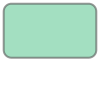

In [6]:
from shapely.geometry import Polygon, Point

def round_corners(polygon, radius):
    new_polygon = polygon.buffer(radius, resolution=16, join_style=1)
    return new_polygon

# Define the polygon vertices
vertices = [(0, 0), (0, 10), (20, 10), (20, 0), (0, 0)]

# Create the polygon object
polygon = Polygon(vertices)

# Round the corners with a radius of 2
rounded_polygon = round_corners(polygon, 2)

# Plot the original and rounded polyggon
rounded_polygon

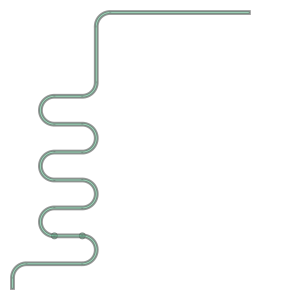

In [23]:
r = 50
w = 10
g = 10
turnradius = 50
l_1 = 400
l_2 = 40
l_3 = 200
l_4 = 100
l_5 =l_4
l_6= 200
l_7 = 500
N = 5

def arc(coord_init, coord_center, angle):


    # local variable
    r = turnradius
    step = 1

    # determine step number
    step_angle = step / r if angle >= 0 else -step / r
    step_N = abs(int(angle / step_angle))
    #laststep_flag = True if angle % step_angle != 0 else False
    laststep_flag = bool(angle % step_angle != 0)

    # generate coordinate
    coord = [coord_init]
    point = coord_init
    for i in range(step_N):
        point = draw.rotate(point,
                            step_angle,
                            origin=coord_center,
                            use_radians=True)
        coord.append(point)
    if laststep_flag:
        point = draw.rotate(coord_init,
                            angle,
                            origin=coord_center,
                            use_radians=True)
        coord.append(point)
    coord = draw.LineString(coord)
    return coord



# create the coupling patch in term of a circle
cppatch = draw.Point(0, -r).buffer(r)

# create the extended arm
## useful coordinates
# x_1, y_1 = l_1 * np.cos(np.pi / 4), -l_1 * np.sin(np.pi / 4)
# x_2, y_2 = x_1 + turnradius * (
#     1 - np.cos(np.pi / 4)), y_1 - turnradius * np.sin(np.pi / 4)
# coord_init = draw.Point(x_1, y_1)
# coord_center = draw.Point(x_1 - turnradius * np.cos(np.pi / 4),
#                           y_1 - turnradius * np.sin(np.pi / 4))
x_3, y_3 = 0, 0
x_4, y_4 = x_3, y_3 +l_2
x_5, y_5 = x_4 + turnradius, y_4
# coord_x2 = draw.Point(x_2,y_2)
coord_init1 = draw.Point(x_4, y_4)
coord_center1 = draw.Point(x_5, y_5)
x_6, y_6 = x_5, y_5 +turnradius
x_7, y_7 = x_5 + l_3, y_6
x_8, y_8 = x_7, y_7 + turnradius
coord_x6 = draw.Point(x_6,y_6)
coord_init2 = draw.Point((x_7, y_7))
coord_center2 = draw.Point((x_8, y_8))

arc2 = arc(coord_init2, coord_center2, np.pi)

x_9, y_9 = x_8, y_8 + turnradius
x_10, y_10 = x_9 - l_4, y_9
x_11, y_11 = x_10, y_10 + turnradius
coord_x9 = draw.Point((x_9,y_9))
coord_init3 = draw.Point((x_10, y_10))
coord_center3 = draw.Point((x_11, y_11))

line11 = draw.LineString([(x_9, y_9), (x_10, y_10)])

arc3 = arc(coord_init3, coord_center3, -np.pi)
x_12, y_12 = x_11, y_11 + turnradius
x_13, y_13 = x_12 + l_5, y_12
# line12 = draw.LineString([(x_12, y_12), (x_13, y_13)])
# x_14, y_14 = x_13, y_13 + turnradius
# coord_x12 = draw.Point(x_12,y_12)
# coord_init4 = draw.Point((x_13, y_13))
# coord_center4 = draw.Point((x_14, y_14))
# arc4 = arc(coord_init4, coord_center4, np.pi)

# x_15,y_15 = x_13, y_13+4*2*turnradius
# x_16,y_16 = x_15,y_15 + turnradius
# x_17,y_17 = x_16+turnradius, y_16
# coord_init5 = draw.Point(x_15,y_15)
# coord_center5 = draw.Point(x_16,y_16)


geometry_list=[]
round_num = math.ceil((N-1)/2)+1
for i in range(N-1):
    geometry_list.append(draw.translate(line11,0,(i+1)*2*turnradius))
    if  (i%2==0):
       geometry_list.append(draw.translate(arc2,0,(i+2)*2*turnradius))
    else:
         geometry_list.append(draw.translate(arc3,0,(i+1)*2*turnradius))

geometry_list.append(draw.translate(line11,0,N*2*turnradius))
if  ((N-1)%2==0):
    x_15,y_15 = x_13, y_13+(N-1)*2*turnradius
    x_16,y_16 = x_15,y_15 + turnradius
    x_17,y_17 = x_16+turnradius, y_16
    coord_init5 = draw.Point(x_15,y_15)
    coord_center5 = draw.Point(x_16,y_16)
    geometry_list.append(arc(coord_init5,coord_center5,np.pi/2))
else:
    x_15,y_15 = x_12,y_12 +(N-1)*2*turnradius
    x_16,y_16 = x_15,y_15 + turnradius
    x_17,y_17 = x_16-turnradius, y_16
    coord_init5 = draw.Point(x_15,y_15)
    coord_center5 = draw.Point(x_16,y_16)
    geometry_list.append(arc(coord_init5,coord_center5,-np.pi/2))

x_18, y_18 = x_17 , y_17 + l_6
x_19,y_19 = x_18+turnradius,y_18
coord_init6 =draw.Point((x_18,y_18))
coord_center6 = draw.Point((x_19,y_19))
x_20, y_20 = x_19 , y_19+turnradius
x_21,y_21 = x_20+l_7,y_20
# line containing the 45deg line, 45 deg arc,
# and a short straight segment for smooth subtraction




geometry_list0 = [
    # draw.LineString([(0, 0), coord_init]),
    # arc(coord_init, coord_center, -np.pi / 4),
    draw.LineString([(x_3, y_3), (x_4, y_4)]),
    arc(coord_init1, coord_center1, -np.pi / 2),
    draw.LineString([(x_6, y_6), (x_7, y_7)]),
    arc2,
    draw.LineString([(x_9, y_9), (x_10, y_10)]), arc3, line11,
    # draw.translate(line12, 0, 2 * turnradius),
    # draw.translate(arc3, 0, 4 * turnradius),
    # draw.translate(line12, 0, 4 * turnradius),
    # draw.translate(arc4, 0, 4 * turnradius),
    # draw.translate(line12, 0, 6 * turnradius),
    # draw.translate(arc3, 0, 8 * turnradius),
    # draw.translate(line12, 0, 8 * turnradius),
    # arc(coord_init5,coord_center5,np.pi/2),
    draw.LineString([(x_17,y_17),(x_18,y_18)]),
    arc(coord_init6, coord_center6, -np.pi/2),
    draw.LineString([(x_20,y_20),(x_21,y_21)])
]
full_shape = geometry_list+geometry_list0
# full_shape = geometry_list0
cparm_line = draw.shapely.ops.unary_union(full_shape)
cparm = cparm_line.buffer(w / 2, cap_style=2, join_style=1)
# eps = 1e-3
# cparm = draw.Polygon(cparm.exterior)
# cparm = cparm.buffer(eps, join_style=2).buffer(-eps, join_style=2)
# ro = draw.shapely.ops.unary_union([cppatch, cparm])
# # ro = draw.shapely.transform(ro,lambda x: -x)
# # ro = draw.shapely.transform(ro,lambda x: x*[-1,1])
# ro_etch = ro.buffer(g, cap_style=2, join_style=2)
# x_15, y_15 = x_14, y_14 + 7 * turnradius
# x_16, y_16 = x_15 + g / 2, y_15
# port_line = draw.LineString([(x_15, y_15 + w / 2),
#                              (x_15, y_15 - w / 2)])
# subtract_patch = draw.LineString([(x_16, y_16 - w / 2 - g - eps),
#                                   (x_16, y_16 + w / 2 + g + eps)
#                                  ]).buffer(g / 2, cap_style=2)
# ro_etch = ro_etch.difference(subtract_patch)
# polys = [ro, ro_etch, port_line]
# # polys = draw.shapely.transform(polys,lambda x: -x)
# [ro, ro_etch, port_line]= draw.shapely.transform(polys,lambda x:x*[-1,1])
# polys = [ro, ro_etch, port_line]
# polys = draw.translate(polys, 0, 0)
# # cparm_inverse
# draw.shapely.geometrycollections([polys[1]])
cparm_mirror = draw.shapely.transform(cparm,lambda x:x*[1,-1])
# draw.shapely.geometrycollections([port_line])
# draw.shapely.geometrycollections([cparm])
draw.shapely.geometrycollections([coord_init3,coord_x9,cparm])
# draw.shapely.geometrycollections([coord_init1,coord_center1,coord_x6,coord_init4,coord_center4,coord_x12,coord_init3,coord_center3,coord_x9,cparm])

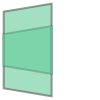

In [12]:
w = 15
g = 7
w0 = 10
g0 = 7
length = 15
orientation = 0
pos_x = 0
pos_y = 0

#draw polygon according to four vertex
x_1= np.array([length/2,0])-np.array([0,w/2])
x_2= np.array([length/2,0])+np.array([0,w/2])
x_3= np.array([-length/2,0])+np.array([0,w0/2])
x_4= np.array([-length/2,0])-np.array([0,w0/2])
pts = np.array([x_1,x_2,x_3,x_4])
line =draw.Polygon(pts)

x_1_etch= np.array([length/2,0])-np.array([0,w/2+g])
x_2_etch= np.array([length/2,0])+np.array([0,w/2+g])
x_3_etch= np.array([-length/2,0])+np.array([0,w0/2+g0])
x_4_etch= np.array([-length/2,0])-np.array([0,w0/2+g0])
pts_etch = np.array([x_1_etch,x_2_etch,x_3_etch,x_4_etch])
line_etch = draw.Polygon(pts_etch)

pin_line = draw.LineString([x_1,x_2])
pin_line0 = draw.LineString([x_3,x_4])
# line_etch
# line
draw.shapely.geometrycollections([line,line_etch,pin_line,pin_line0])

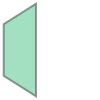